# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps

import warnings
warnings.filterwarnings('ignore')

# 2. Loading Data

In [2]:
df_info_clients = pd.read_csv('data/clients_informations.csv')

### 2.1 Data Summary: 
- **Amostra:** id

- **id_cliente:** client id

- **id_unico_cliente:**: client specific id

- **item-id:** product id

- **cep_cliente:** client's postal code

- **cidade cliente:** client's city

- **estado_cliente:** client's state

- **id_pedido:** order id

- **status_pedido:** order's status

- **horario pedido:** date and time that order was made by the client

- **pedido_aprovado:** date and time that the order was approved in the website

- **pedido_entregador:** date and time that the order was leaving for delivery

- **pedido_entregue:** date and time that the order was delivery to the client

- **data_estimada:** estimate date that the order will arrive to the client

- **id_vendedor:** salesman's id

- **preco:** price of the order in reais (R$)

- **frete:** delivery's price

- **pagamento_sequencial:**

- **pagamento_tipo:** which method the client chose to pay

- **pagamento_prestacoes:** number of parcels that the client will pay the order's value

- **pagamento_valor:** order's price + dlivery's price

- **review:** stars rating of the client

- **categoria:** product's category

- **categoria_ingles:** product's category in english

- **cep_vendedor:** salesman postal code

- **cidade_vendedor:** salesman city

- **estado_vendedor:** sales person state


In [3]:
df_info_clients.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


### 2.2 Rename Columns

In [4]:
new_columns = [ 'id',  'client_id', 'client_specific_id', 'item_id', 'client _postal_code', 'client_city', 'client_state', 'order_id', 'order_status', 'order_date', 'order_approved', 'order_dliveryman',
               'order_delivery', 'order_estimated', 'salesman_id', 'order_price', 'delivery_price', 'sequence_pay', 'paymeny_type', 'divided_pay', 'total_price', 'review', 'category', 'category_english',
               'salesman_postal', 'salesman_city', 'salesman_state']

df_info_clients.columns = new_columns

### 2.3 Data Caracteristics

In [5]:
print('Number of Rows: {}'.format( df_info_clients.shape[0] ) )
print( 'Number of Columns: {}'.format( df_info_clients.shape[1] ) )

Number of Rows: 116581
Number of Columns: 27


In [6]:
print('Data Types')
df_info_clients.dtypes

Data Types


id                       int64
client_id               object
client_specific_id      object
item_id                  int64
client _postal_code      int64
client_city             object
client_state            object
order_id                object
order_status            object
order_date              object
order_approved          object
order_dliveryman        object
order_delivery          object
order_estimated         object
salesman_id             object
order_price            float64
delivery_price         float64
sequence_pay             int64
paymeny_type            object
divided_pay              int64
total_price            float64
review                   int64
category                object
category_english        object
salesman_postal          int64
salesman_city           object
salesman_state          object
dtype: object

In [7]:
print("Check Null Values")
df_info_clients.isna().sum()

Check Null Values


id                        0
client_id                 0
client_specific_id        0
item_id                   0
client _postal_code       0
client_city               0
client_state              0
order_id                  0
order_status              0
order_date                0
order_approved           14
order_dliveryman       1213
order_delivery         2515
order_estimated           0
salesman_id               0
order_price               0
delivery_price            0
sequence_pay              0
paymeny_type              0
divided_pay               0
total_price               0
review                    0
category                  0
category_english          0
salesman_postal           0
salesman_city             0
salesman_state            0
dtype: int64

In order to analyse the null values, I will create a query to count the status of them

In [8]:
query = """
select order_status, 
count(id)
from df_info_clients
where order_approved is null 
or order_dliveryman is null 
or order_delivery is null 
group by order_status
"""
ps.sqldf(query, locals())

,order_status,count(id)
0,approved,3
1,canceled,546
2,delivered,23
3,invoiced,364
4,processing,362
5,shipped,1225
6,unavailable,7


In [9]:
query = """select * from df_info_clients
where (order_approved is null 
or order_dliveryman is null 
or order_delivery is null)
and order_status = 'delivered'  
"""
ps.sqldf(query, locals()).iloc[:, 8:14]

,order_status,order_date,order_approved,order_dliveryman,order_delivery,order_estimated
0,delivered,2017-02-18 15:52:27,None,2017-02-23 03:09:14,2017-03-07 13:57:47,2017-03-29 00:00:00
1,delivered,2017-01-19 22:26:59,None,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
2,delivered,2017-02-19 01:28:47,None,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
3,delivered,2017-01-19 12:48:08,None,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
4,delivered,2017-02-18 11:04:19,None,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
5,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,None,None,2017-06-23 00:00:00
6,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,None,2018-06-26 00:00:00
7,delivered,2017-02-18 22:49:19,None,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00
8,delivered,2017-02-18 22:49:19,None,2017-02-22 11:31:06,2017-03-02 12:06:06,2017-03-21 00:00:00
9,delivered,2017-02-18 12:45:31,None,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00


It is possible to see that only 23 of the null values are erros, because the status is "delivered" but they do not have: 
- the date of order approval 

or 
- the date that the order was leaving for delivery 

or 
- the date that the order was delivery to the client

For this reason, I will delete these values.

In [10]:
query = """select * from df_info_clients
where (order_approved is not null 
and order_dliveryman is not null 
and order_delivery is not null)
or order_status <> 'delivered';
"""
df_info_clients = ps.sqldf(query, locals())

# 3 Exploratory Data Analysis
In order to understand and get more familiar with the dataset, I will perform a exploratory data analysis.

### 3.1) Categorical variables
#### 3.1.1) Item ID

1     102096
2      10168
3       2363
4        984
5        465
6        263
7         61
8         36
9         29
10        26
11        18
12        13
13         8
14         7
15         5
16         3
17         3
18         3
19         3
20         3
21         1
Name: item_id, dtype: int64


<AxesSubplot:xlabel='item_id', ylabel='count'>

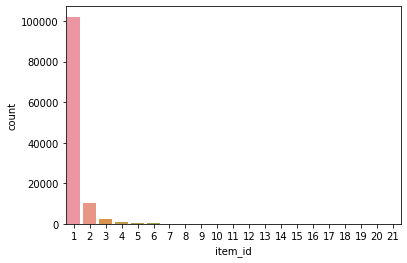

In [11]:
print(df_info_clients['item_id'].value_counts(normalize=False))
sns.countplot(data=df_info_clients, x="item_id")

### 3.1.2) City

sao paulo                18411
rio de janeiro            8121
belo horizonte            3218
brasilia                  2452
curitiba                  1799
campinas                  1722
porto alegre              1640
salvador                  1498
guarulhos                 1387
sao bernardo do campo     1100
niteroi                   1047
santo andre                906
osasco                     894
goiania                    852
santos                     836
Name: client_city, dtype: int64


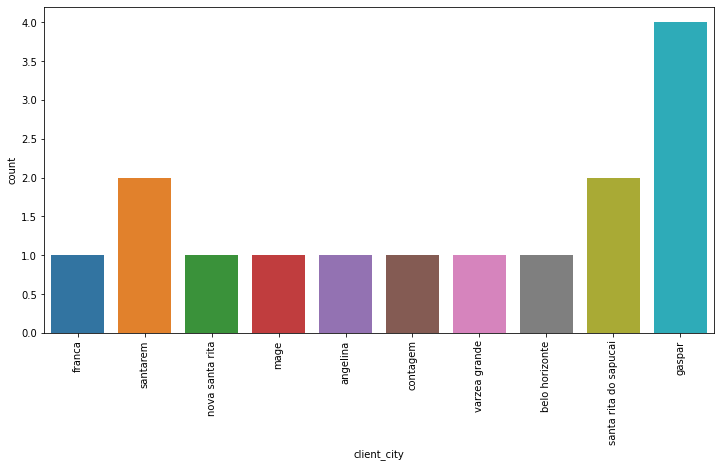

In [12]:
print(df_info_clients['client_city'].value_counts(normalize=False).head(15))
plt.figure(figsize=(12, 6))
sns.countplot(data=df_info_clients.head(15), x="client_city")
plt.xticks(rotation=90)
plt.show()

#### 3.1.3) State

In [14]:
print(df_info_clients['client_state'].value_counts(normalize=False))
plt.figure(figsize=(12, 6))
sns.countplot(data=df_info_clients, x="client_state", order =df_info_clients['client_state'])
plt.xticks(rotation=90)
plt.show()

SP    49121
RJ    15182
MG    13527
RS     6433
PR     5908
SC     4254
BA     3994
DF     2467
GO     2396
ES     2332
PE     1878
CE     1537
MT     1116
PA     1103
MS      847
MA      837
PB      630
PI      567
RN      565
AL      458
SE      395
TO      334
RO      280
AM      170
AC       93
AP       84
RR       50
Name: client_state, dtype: int64


KeyboardInterrupt: 

<Figure size 864x432 with 0 Axes>

#### 3.1.4) .